## Fake News Detection

#### Import library

In [11]:
# import Library
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools as iter
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import seaborn as sn

In [12]:
# !pip install pandas     # download and install pandas library

In [13]:
# initialize the datasets
dataset = pd.read_csv('fake_or_real_news (2).csv')

In [14]:
x = dataset['text']

In [15]:
y = dataset['label']

In [16]:
dataset.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [17]:
# dataset shape: no. of rows and no. of col.
dataset.shape

(6335, 4)

In [18]:
dataset.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [19]:
labels = dataset.label

In [20]:
# Print Real Colm.
print(dataset.label[dataset.label=="REAL"])

2       REAL
4       REAL
7       REAL
8       REAL
9       REAL
        ... 
6324    REAL
6327    REAL
6330    REAL
6333    REAL
6334    REAL
Name: label, Length: 3171, dtype: object


In [21]:
# Print FAKE Colm.
print(dataset.label[dataset.label=="FAKE"])

0       FAKE
1       FAKE
3       FAKE
5       FAKE
6       FAKE
        ... 
6326    FAKE
6328    FAKE
6329    FAKE
6331    FAKE
6332    FAKE
Name: label, Length: 3164, dtype: object


In [22]:
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(dataset["text"], labels, test_size = 0.2, random_state = 20)

In [26]:
x_train.head()

4741    NAIROBI, Kenya — President Obama spoke out Sun...
2089    Killing Obama administration rules, dismantlin...
4074    Dean Obeidallah, a former attorney, is the hos...
5376      WashingtonsBlog \nCNN’s Jake Tapper hit the ...
6028    Some of the biggest issues facing America this...
Name: text, dtype: object

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

In [28]:
# initilise a Tfidvectorizer
vector = TfidfVectorizer(stop_words='english', max_df=0.7)

In [29]:
# fit and tranform
tf_train = vector.fit_transform(x_train)
tf_test = vector.transform(x_test)

In [30]:
# initilise a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [31]:
# predicton the tst dataset
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = pac.predict(tf_test)

In [32]:
score = accuracy_score(y_test, y_pred)

In [33]:
print(f"Accuracy : {round(score*100,2)}%")

Accuracy : 95.11%


In [34]:
# confusion metrics
confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])

array([[623,  25],
       [ 37, 582]], dtype=int64)

In [36]:
#Creating a pipeline that first creates bag of words(after applying stopwords) & then applies Multinomial Naive Bayes model
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                    ('nbmodel', MultinomialNB())])

In [37]:
#Training our data
pipeline.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('nbmodel', MultinomialNB())])

In [38]:
#Predicting the label for the test data
pred = pipeline.predict(x_test)

In [39]:
# Score: Accuracy
score = accuracy_score(y_test, pred)
print(f'Accuracy: {round(score*100,2)}%')
tfidf = TfidfVectorizer(stop_words="english", max_df=0.7)
tfidf_train = tfidf.fit_transform(x_train)
tfidf_test = tfidf.transform(x_test)

Accuracy: 82.32%


In [40]:
# Passive Aggressive Classification
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)
y_pred = pac.predict(tfidf_test)
pac_score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(pac_score*100,2)}%')

Accuracy: 94.95%


In [41]:
# print classifiaction report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        FAKE       0.97      0.68      0.80       648
        REAL       0.74      0.98      0.84       619

    accuracy                           0.82      1267
   macro avg       0.86      0.83      0.82      1267
weighted avg       0.86      0.82      0.82      1267



In [42]:
#print confusion matrix
print(confusion_matrix(y_test, pred))

[[438 210]
 [ 14 605]]


<AxesSubplot:>

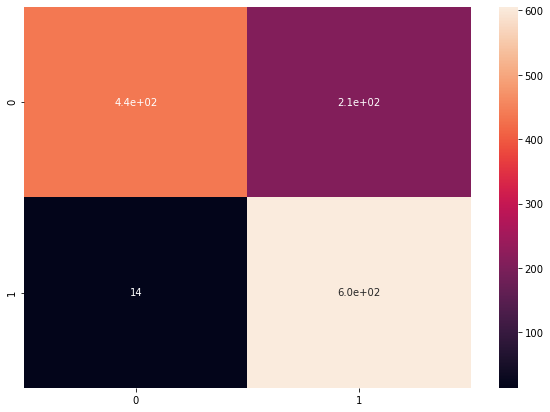

In [44]:
# plot heat map 
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix(y_test, pred), annot=True)

In [45]:
# save model
import pickle
filename = 'finalized_model.pkl'
pickle.dump(pac, open(filename, 'wb'))

In [46]:
# save vectorizer
filename = 'vectorizer.pkl'
pickle.dump(vector, open(filename, 'wb'))